In [ ]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
test = pd.read_csv('test_data.csv')
print(test.columns)
test.info()
test.describe()

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           1206 non-null   object 
 1   magnitude_of_delay  1206 non-null   object 
 2   delay_in_seconds    1206 non-null   int64  
 3   affected_roads      1184 non-null   object 
 4   record_date         1206 non-null   object 
 5   luminosity          1206 non-null   object 
 6   avg_temperature     1206 non-null   float64
 7   avg_atm_pressure    1206 non-null   float64
 8   avg_humidity        1206 non-null   float64
 9   avg_wind_speed      1206 non-null   float64
 10  avg_precipitation   1206 non-null   float64
 11 

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.0
mean,565.080431,14.649254,1018.024876,73.865672,1.332504,0.0
std,1584.544376,4.691180,5.338753,17.202341,1.337510,0.0
min,0.000000,2.000000,999.000000,7.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,62.000000,0.000000,0.0
50%,0.000000,14.000000,1018.000000,77.000000,1.000000,0.0
75%,268.750000,18.000000,1022.000000,90.000000,2.000000,0.0
max,14866.000000,30.000000,1031.000000,100.000000,9.000000,0.0


In [ ]:
test.duplicated().sum()

0

In [ ]:
test.isna().any()
print(test.isna().sum())

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        22
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
dtype: int64


In [ ]:
training = pd.read_csv('training_data.csv')
print(training.columns)
training.info()
training.describe()

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain',
       'incidents'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


# Ver se há valores duplicados:

In [ ]:
training.duplicated().sum()

0

# Ver se há valores nulos:
Como a coluna "affected_roads" tem valores nulos e não afeta em nada o modelo, decidimos retirar esta coluna.

In [ ]:
training.isna().any()
print(training.isna().sum())

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64


In [ ]:
training.drop(["affected_roads"], axis=1, inplace=True)

# Ver valores diferentes de cada tabela:

In [ ]:
ds = training.copy()
print("incidents: ")
print(ds["incidents"].drop_duplicates())
print(ds["avg_rain"].drop_duplicates())
print(ds["magnitude_of_delay"].drop_duplicates())
print(ds["luminosity"].drop_duplicates())

0         None
2          Low
3    Very_High
4         High
5       Medium
Name: incidents, dtype: object
0           Sem Chuva
15     chuva moderada
25        chuva fraca
249       chuva forte
Name: avg_rain, dtype: object
0      UNDEFINED
3          MAJOR
329     MODERATE
Name: magnitude_of_delay, dtype: object
0          DARK
2         LIGHT
27    LOW_LIGHT
Name: luminosity, dtype: object


# Remover colunas com apenas um valor 


As colunas "avg_precipitation" e "city_name" possuem sempre o mesmo valor por isso são retiradas.

In [ ]:
training.nunique()

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                5
dtype: int64

In [ ]:

training.drop('avg_precipitation',axis=1,inplace=True)
training.drop('city_name',axis=1,inplace= True)

# Substituição das variáveis categóricas por numéricas através de One-Hot encoding

In [ ]:
replace_map_incidents = {"incidents" : {"None" : 0 , "Low" : 1,"Medium" : 2 , "High" : 3,"Very_High" : 4 }}
replace_map_avg_rain = {"avg_rain" : {"Sem Chuva" : 0 , "chuva fraca" : 1,"chuva moderada" : 2 , "chuva forte" : 3 }}
replace_map_avg_luminosity = {"luminosity" : {"DARK" : 0 , "LIGHT" : 2,"LOW_LIGHT" : 1 }}
replace_map_avg_magnitude_of_delay = {"magnitude_of_delay" : {"UNDEFINED" : 0 ,"MODERATE" : 1 ,"MAJOR" : 2 }}

training.replace(replace_map_incidents,inplace =True)
training.replace(replace_map_avg_rain,inplace =True)
training.replace(replace_map_avg_luminosity,inplace =True)
training.replace(replace_map_avg_magnitude_of_delay,inplace =True)
training.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,0,0,2021-03-15 23:00,0,12.0,1013.0,70.0,1.0,0,0
1,0,385,2021-12-25 18:00,0,12.0,1007.0,91.0,1.0,0,0
2,0,69,2021-03-12 15:00,2,14.0,1025.0,64.0,0.0,0,1
3,2,2297,2021-09-29 09:00,2,15.0,1028.0,75.0,1.0,0,4
4,0,0,2021-06-13 11:00,2,27.0,1020.0,52.0,1.0,0,3


# Passar única coluna correspondente à data para cinco colunas correspondentes a ano, mês, dia, horas e minutos

In [ ]:
training["record_date"] = pd.to_datetime(training["record_date"],format = '%Y-%m-%d %H:%M' , errors="coerce")

training['record_year'] = training["record_date"].dt.year
training['record_month'] = training["record_date"].dt.month
training['record_day'] = training["record_date"].dt.day
training['record_hour'] = training["record_date"].dt.hour
training['record_minute'] = training["record_date"].dt.minute
training.describe()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_year,record_month,record_day,record_hour,record_minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.0,5000.000000,5000.000000,5000.000000,5000.0
mean,0.272800,560.567000,0.967200,14.583000,1018.145000,74.455000,1.253500,0.055400,1.5010,2021.0,7.131600,15.888400,11.404800,0.0
std,0.685328,1686.859581,0.980773,4.820514,5.174372,17.204638,1.269847,0.258349,1.4881,0.0,3.442129,8.734736,6.910404,0.0
min,0.000000,0.000000,0.000000,1.000000,997.000000,6.000000,0.000000,0.000000,0.0000,2021.0,1.000000,1.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,11.000000,1015.000000,63.000000,0.000000,0.000000,0.0000,2021.0,4.000000,8.000000,5.000000,0.0
50%,0.000000,0.000000,1.000000,14.000000,1019.000000,78.000000,1.000000,0.000000,1.0000,2021.0,7.000000,16.000000,11.000000,0.0
75%,0.000000,234.000000,2.000000,18.000000,1022.000000,90.000000,2.000000,0.000000,3.0000,2021.0,10.000000,23.000000,17.000000,0.0
max,2.000000,31083.000000,2.000000,35.000000,1032.000000,100.000000,10.000000,3.000000,4.0000,2021.0,12.000000,31.000000,23.000000,0.0


# Retirar colunas dos minutos e ano porque têm sempre os mesmos valores e por isso não acrescentam nada ao modelo.

In [ ]:
training.drop("record_date",axis=1,inplace = True)
training.drop("record_minute",axis=1,inplace = True)
training.drop("record_year",axis=1,inplace = True)

training.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_month,record_day,record_hour
0,0,0,0,12.0,1013.0,70.0,1.0,0,0,3,15,23
1,0,385,0,12.0,1007.0,91.0,1.0,0,0,12,25,18
2,0,69,2,14.0,1025.0,64.0,0.0,0,1,3,12,15
3,2,2297,2,15.0,1028.0,75.0,1.0,0,4,9,29,9
4,0,0,2,27.0,1020.0,52.0,1.0,0,3,6,13,11


# Analisar relação entre as colunas

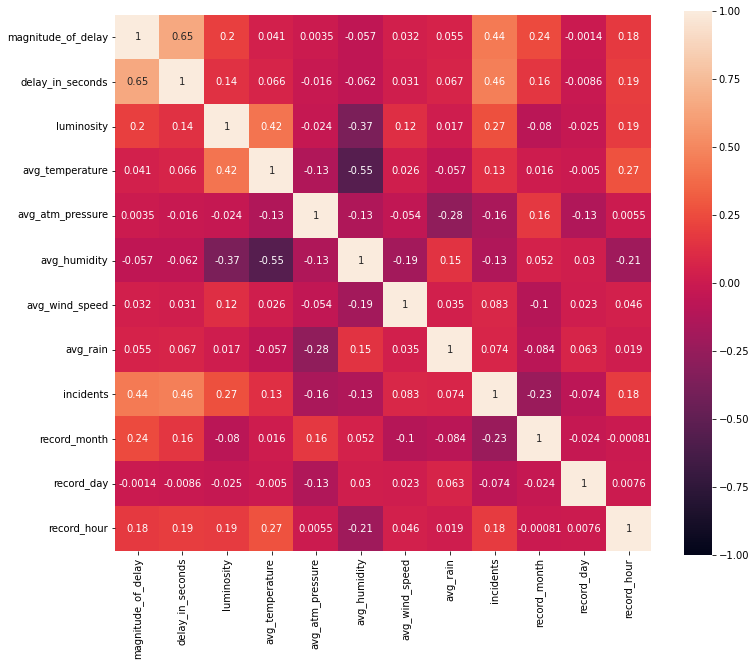

In [ ]:
#matriz de correlação

corr_matrix = training.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)